In [2]:
import pandas as pd
import sqlite3
import numpy as np

# Bloody Roar Tier List

Bloody Roar es un juego de peleas 3D Relativamente equilibrado, sin embargo las mecanicas implementadas e el juego y la cantidad de herramientas que le ofrece al jugador, puede lograr equilibrar el juego, basicamente la tasa de victorias depende de habilidad del jugador y de su creatividad para salir de diferentes situaciones.

Algo a notar es que el daño generado por un personaje es algo aleatorio, algunas veces depende de si el golpe dado fue a la espalda del contrincante o por un contraataque,
esto puede distorcionar claramente el resultado de descubrir fielmente la lista del mejor peleador al peor.

La prueba fue hecha ejecutando peleas CPU vs CPU, con el máximo de rounds 4, con máximo daño 8 y con el maximo nivel de dificultad 8, aunque el juego tiene varios niveles de dificultad de CPU, basicamente tiene 2, una version tonta y una version experta, en Arcade esto se hace mas evidente cuando pierdes una pelea contra un personaje de la CPU bastante dificil, automaticamente continuas con la revancha, aparece la CPU tonta, del mismo modo pero de manera aleatoria aparece la CPU tonta, lo que tambien afecta el descubrimiento de la Tier List, porque la CPU no está demostrando sus capacidades al 100%

In [3]:
conn = sqlite3.connect('BR2TierList.db')
query = 'SELECT * FROM Partidas;'

df = pd.read_sql_query(query, conn)
df.set_index('id', inplace=True)
conn.close()
df

,p1_char,p1_rounds,p2_char,p2_rounds
id,,,,
1,1,2,2,4
2,1,4,2,2
3,1,1,2,4
4,1,4,2,2
5,1,4,2,3
...,...,...,...,...
896,10,4,9,2
897,10,2,9,4
898,10,4,9,2


In [4]:
# Categorizar las columnas p1_char y p2_char con los nombres de los personajes
# 1 = Yugo, 2 = Kuro, 3 = Genji, 4 = Genio, 5 = Sombra, 6 = Luco, 7 = Zarya, 8 = Pharah, 9 = Reaper, 10 = Mei, 11 = Junkrat

df['p1_char'] = df['p1_char'].replace({1: 'Yugo', 2: 'Stun', 3: 'Shina', 4: 'Bakuryu', 5: 'Long', 6: 'Alice', 7: 'Uriko', 8: 'Busuzima', 9: 'Jenny', 10: 'Gado', 11: 'Shen Long'})
df['p2_char'] = df['p2_char'].replace({1: 'Yugo', 2: 'Stun', 3: 'Shina', 4: 'Bakuryu', 5: 'Long', 6: 'Alice', 7: 'Uriko', 8: 'Busuzima', 9: 'Jenny', 10: 'Gado', 11: 'Shen Long'})

df['p1_char'] = df['p1_char'].astype('category')
df['p2_char'] = df['p2_char'].astype('category')

In [5]:
df.info()

# Buscando los valores unicos de cada columna

df.p1_char.unique()
#df.p2_char.unique()
#df.p1_rounds.unique()
#df.p2_rounds.unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 1 to 900
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   p1_char    900 non-null    category
 1   p1_rounds  900 non-null    int64   
 2   p2_char    900 non-null    category
 3   p2_rounds  900 non-null    int64   
dtypes: category(2), int64(2)
memory usage: 23.6 KB


['Yugo', 'Stun', 'Shina', 'Bakuryu', 'Long', 'Alice', 'Uriko', 'Busuzima', 'Jenny', 'Gado']
Categories (10, object): ['Alice', 'Bakuryu', 'Busuzima', 'Gado', ..., 'Shina', 'Stun', 'Uriko', 'Yugo']

In [6]:
# Agregan la columna de ganadores
df['p1_wins'] = df['p1_rounds'] == 4
df['p2_wins'] = df['p2_rounds'] == 4
df


,p1_char,p1_rounds,p2_char,p2_rounds,p1_wins,p2_wins
id,,,,,,
1,Yugo,2,Stun,4,False,True
2,Yugo,4,Stun,2,True,False
3,Yugo,1,Stun,4,False,True
4,Yugo,4,Stun,2,True,False
5,Yugo,4,Stun,3,True,False
...,...,...,...,...,...,...
896,Gado,4,Jenny,2,True,False
897,Gado,2,Jenny,4,False,True
898,Gado,4,Jenny,2,True,False


<AxesSubplot: title={'center': 'P1 vs P2'}, xlabel='p1_char,p2_char', ylabel='p1_wins,p2_wins'>

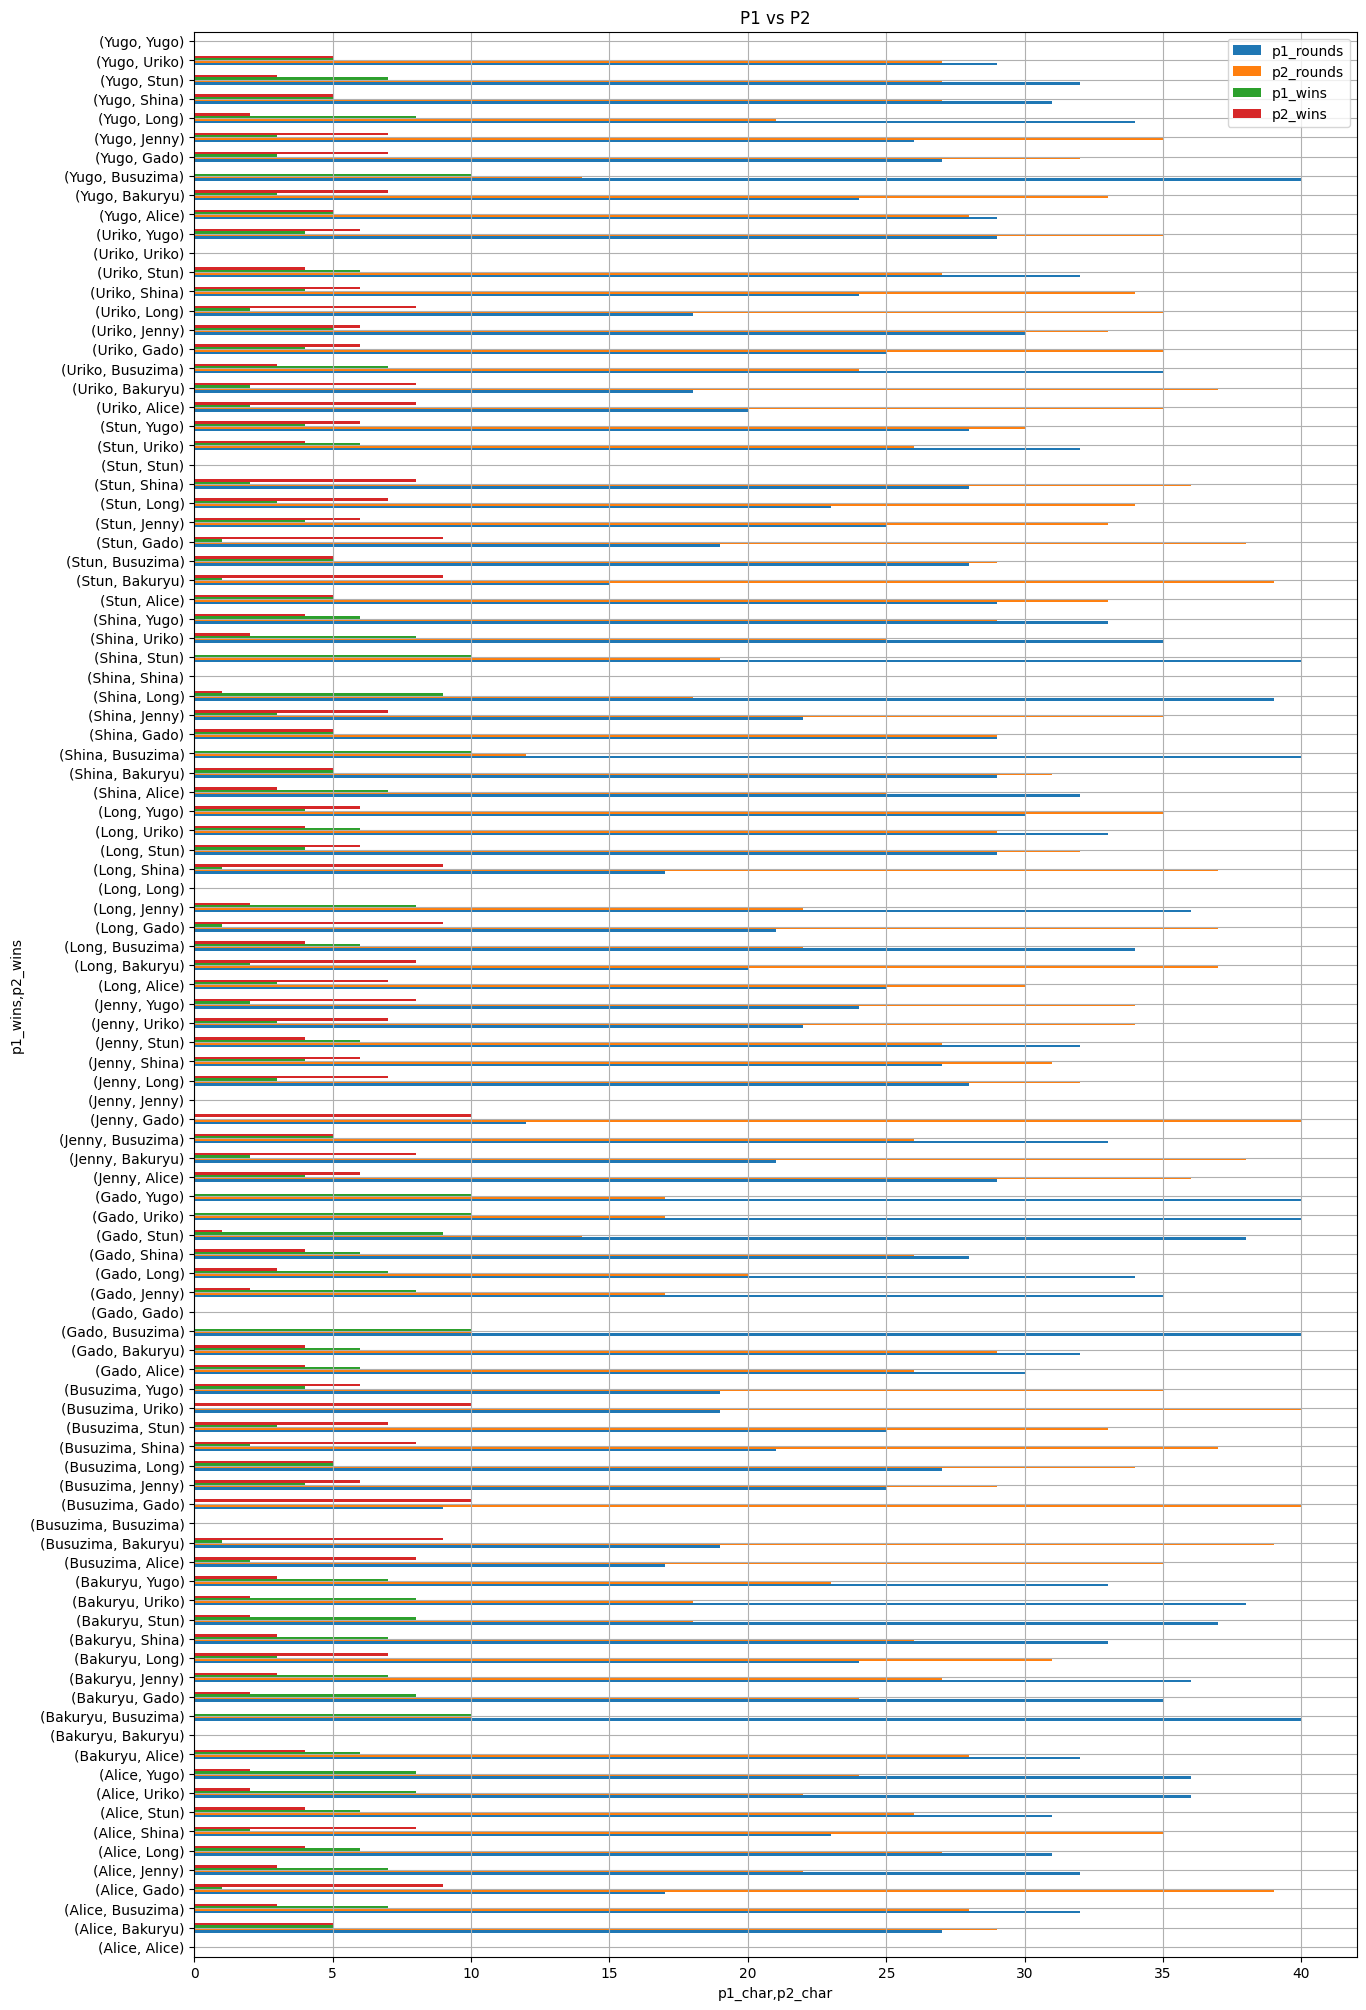

In [44]:
df.groupby(['p1_char', 'p2_char']).sum().plot.barh(figsize=(15, 25), title='P1 vs P2', xlabel='p1_char,p2_char', grid=True, ylabel='p1_wins,p2_wins')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 1 to 900
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   p1_char    900 non-null    category
 1   p1_rounds  900 non-null    int64   
 2   p2_char    900 non-null    category
 3   p2_rounds  900 non-null    int64   
 4   p1_wins    900 non-null    bool    
 5   p2_wins    900 non-null    bool    
dtypes: bool(2), category(2), int64(2)
memory usage: 25.4 KB


<AxesSubplot: title={'center': 'P1 Rounds'}, xlabel='p1_char'>

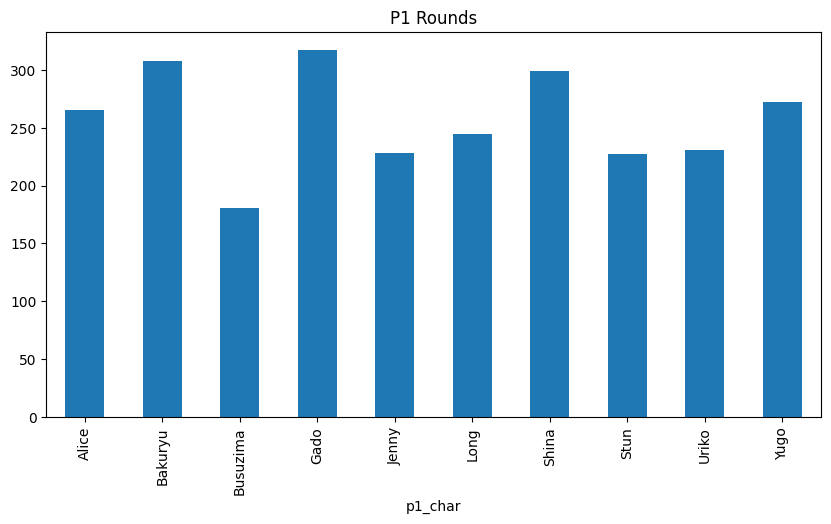

In [13]:
df.groupby('p1_char').p1_rounds.sum().plot(kind='bar', figsize=(10, 5), title='P1 Rounds')

In [14]:
df.groupby('p1_char').p1_rounds.sum()

p1_char
Alice       265
Bakuryu     308
Busuzima    181
Gado        317
Jenny       228
Long        245
Shina       299
Stun        227
Uriko       231
Yugo        272
Name: p1_rounds, dtype: int64

<AxesSubplot: title={'center': 'P2 Rounds'}, xlabel='p2_char'>

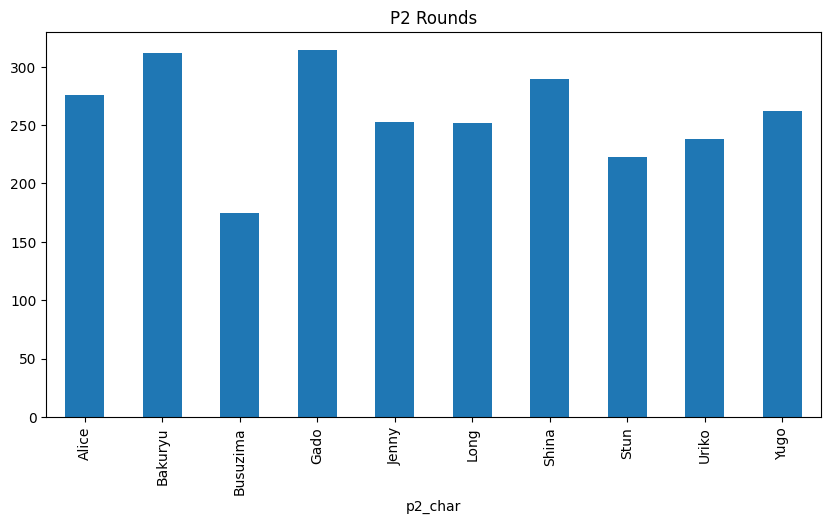

In [15]:
df.groupby('p2_char').p2_rounds.sum().plot(kind='bar', figsize=(10, 5), title='P2 Rounds')

In [16]:
df.groupby('p2_char').p2_rounds.sum()

p2_char
Alice       276
Bakuryu     312
Busuzima    175
Gado        314
Jenny       253
Long        252
Shina       289
Stun        223
Uriko       238
Yugo        262
Name: p2_rounds, dtype: int64

<AxesSubplot: title={'center': 'P1 Wins'}, xlabel='p1_char'>

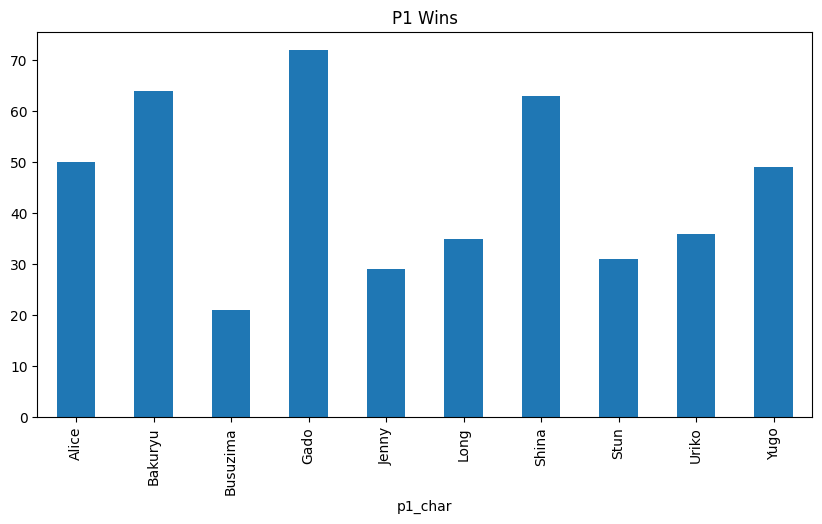

In [17]:
df.groupby('p1_char').p1_wins.sum().plot(kind='bar', figsize=(10, 5), title='P1 Wins')

In [18]:
df.groupby('p1_char').p1_wins.sum()

p1_char
Alice       50
Bakuryu     64
Busuzima    21
Gado        72
Jenny       29
Long        35
Shina       63
Stun        31
Uriko       36
Yugo        49
Name: p1_wins, dtype: int64

### Lista de personajes.

1. Yugo
2. Stun
3. Shina
4. Bakuryu
5. Long
6. Alice
7. Yuriko
8. Buzusima
9. Yenny
10. Gado
11. Shen Long


In [26]:
yugo_mask = (df.p1_char == 'Yugo') & (df.p2_char == 'Stun')
yugo_df = df[yugo_mask]
yugo_df.groupby('p1_char').p1_rounds.sum()


p1_char
Alice        0
Bakuryu      0
Busuzima     0
Gado         0
Jenny        0
Long         0
Shina        0
Stun         0
Uriko        0
Yugo        32
Name: p1_rounds, dtype: int64

In [29]:

mask = (df.p1_char == 'Yugo') & (df.p2_char == 'Stun')
yugo2_df = df[mask]
yugo2_df.groupby('p1_char').corr()

/tmp/ipykernel_7936/1412328172.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yugo2_df.groupby('p1_char').corr()


p1_rounds  p2_rounds   p1_wins   p2_wins
p1_char                                                     
Alice    p1_rounds        NaN        NaN       NaN       NaN
         p2_rounds        NaN        NaN       NaN       NaN
         p1_wins          NaN        NaN       NaN       NaN
         p2_wins          NaN        NaN       NaN       NaN
Bakuryu  p1_rounds        NaN        NaN       NaN       NaN
         p2_rounds        NaN        NaN       NaN       NaN
         p1_wins          NaN        NaN       NaN       NaN
         p2_wins          NaN        NaN       NaN       NaN
Busuzima p1_rounds        NaN        NaN       NaN       NaN
         p2_rounds        NaN        NaN       NaN       NaN
         p1_wins          NaN        NaN       NaN       NaN
         p2_wins          NaN        NaN       NaN       NaN
Gado     p1_rounds        NaN        NaN       NaN       NaN
         p2_rounds        NaN        NaN       NaN       NaN
         p1_wins          NaN        NaN       NaN       NaN
         p2_wins          NaN        NaN       NaN       NaN
Jenny    p1_rounds        NaN        NaN       NaN       NaN
         p2_rounds        NaN        NaN       NaN       NaN
         p1_wins          NaN        NaN       NaN       NaN
         p2_wins          NaN        NaN       NaN       NaN
Long     p1_rounds        NaN        NaN       NaN       NaN
         p2_rounds        NaN        NaN       NaN       NaN
         p1_wins          NaN        NaN       NaN       NaN
         p2_wins          NaN        NaN       NaN       NaN
Shina    p1_rounds        NaN        NaN       NaN       NaN
         p2_rounds        NaN        NaN       NaN       NaN
         p1_wins          NaN        NaN       NaN       NaN
         p2_wins          NaN        NaN       NaN       NaN
Stun     p1_rounds        NaN        NaN       NaN       NaN
         p2_rounds        NaN        NaN       NaN       NaN
         p1_wins          NaN        NaN       NaN       NaN
         p2_wins          NaN        NaN       NaN       NaN
Uriko    p1_rounds        NaN        NaN       NaN       NaN
         p2_rounds        NaN        NaN       NaN       NaN
         p1_wins          NaN        NaN       NaN       NaN
         p2_wins          NaN        NaN       NaN       NaN
Yugo     p1_rounds   1.000000  -0.828534  0.978399 -0.978399
         p2_rounds  -0.828534   1.000000 -0.846826  0.846826
         p1_wins     0.978399  -0.846826  1.000000 -1.000000
         p2_wins    -0.978399   0.846826 -1.000000  1.000000

In [31]:
yugo_df[(yugo_df['p1_char'] == 'Yugo')].p1_rounds.value_counts()

4    7
1    2
2    1
Name: p1_rounds, dtype: int64

In [57]:
yugo_df[(yugo_df['p2_char'] == 1)].p2_rounds.value_counts()

Series([], Name: p2_rounds, dtype: int64)